# Md Sajadul Islam
Bsc in CSE 
Research Interest : Machine Learning, Deep Learning, Data Mining, Cyber Security, Data Scince

# Project Name: A Machine Learning Approach for Spam Email Detection 

# Goal of this Project:
1) Detect the spam mail with around 98% accuracy
2) Use LGR and NB machine Learning model to detect spam mail with high accuracy 
3) Save the internet user from spam mail
4) To use TfidfVectorizer to convert string to numeric
5) Explore some insights of mail_data set with visulization 


In [46]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv(r'C:\Users\mdsaj\Downloads\mail_data.csv')

In [13]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [15]:
df.shape

(5572, 2)

In [17]:
value_counts = df['Category'].value_counts()
print(value_counts)

ham     4825
spam     747
Name: Category, dtype: int64


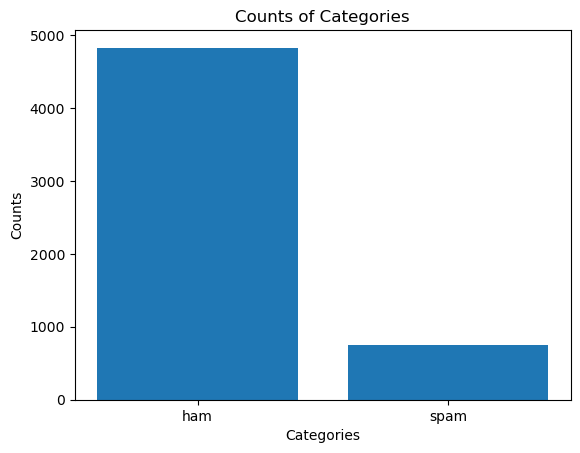

In [21]:
import matplotlib.pyplot as plt
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Categories')
plt.show()

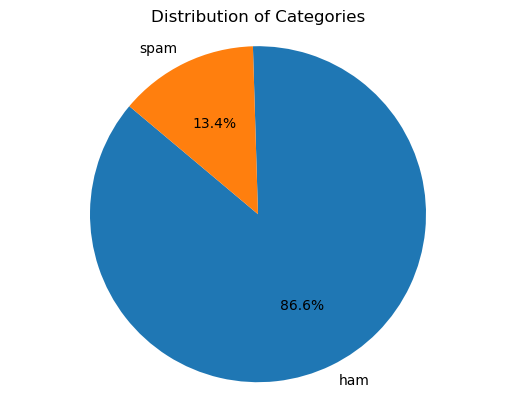

In [23]:
#plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.pie(value_counts, labels = value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Categories')
plt.show()

In [24]:
# null value check
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [27]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
df.shape

(5572, 2)

In [31]:
df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1

In [32]:
X = df['Message']
Y = df['Category']

In [33]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [34]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 3)

In [42]:
print(X.shape)
print(X_train.shape)
print(Y_train.shape)

(5572,)
(4457,)
(4457,)


In [50]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [51]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [78]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# LogistricRegression Model

In [53]:
# LogistricRegression Model
model1 = LogisticRegression()

In [54]:
model1.fit(X_train_features, Y_train)

LogisticRegression()

In [55]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [56]:
print('Accuracy of Training Data: ', accuracy_on_training_data)

Accuracy of Training Data:  0.9670181736594121


In [60]:
# test accuracy
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_test_data)

In [61]:
print('Accuracy of Testing Data: ',accuracy_on_testing_data)

Accuracy of Testing Data:  0.9659192825112107


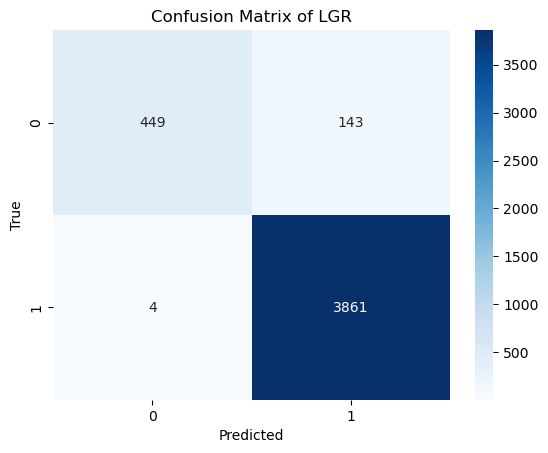

In [79]:
# Compute the confusion matrix of NB
conf_matrix = confusion_matrix(Y_train, model.predict(X_train_features))

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of LGR')
plt.show()

# Naive Bayes 

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [65]:
nb.fit(X_train_features, Y_train)

MultinomialNB()

In [73]:
nb_accuracy_on_train = accuracy_score(Y_train, nb.predict(X_train_features))

In [74]:
print("Accuracy of NB for traing Data: ", nb_accuracy_on_train)

Accuracy of NB for traing Data:  0.9807045097599282


In [76]:
nb_accuracy_on_test = accuracy_score(Y_test, model.predict(X_test_features))
print("Accuracy of NB for testing Data: ", nb_accuracy_on_test)

Accuracy of NB for testing Data:  0.9659192825112107


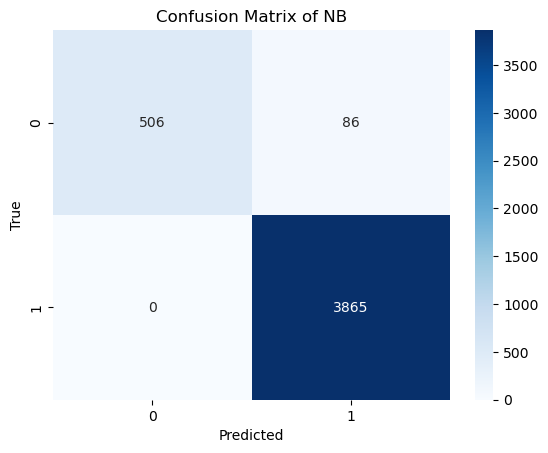

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix of NB
conf_matrix = confusion_matrix(Y_train, nb.predict(X_train_features))

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of NB')
plt.show()

# Real Time Prediction

In [84]:
while True:
    user_input = input("Enter the mail for checking spam (type 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        print("Exiting...")
        break  # Exit the loop if the user types 'exit'
    
    input_features = feature_extraction.transform([user_input])
    prediction = nb.predict(input_features)
    
    if prediction[0] == 1:
        print("You entered a legitimate mail.")
    else:
        print("You entered a spam mail.")


Enter the mail for checking spam (type 'exit' to quit): Free entry in 2 a wkly comp to win FA Cup fina...
You entered a spam mail.
Enter the mail for checking spam (type 'exit' to quit): U dun say so early hor... U c already then say...
You entered a legitimate mail.
Enter the mail for checking spam (type 'exit' to quit): exit
Exiting...
